In [1]:
import pandas as pd
import sqlite3 as sl
conn = sl.connect('NYT_covid.db')
c = conn.cursor()

In [2]:
# join county data with mask use survey data

df = pd.read_sql('''SELECT c.date, state, county, cases, deaths,
                           m.never as pct_never_mask,
                           m.rarely as pct_rarely_mask,
                           m.sometimes as pct_sometimes_mask,
                           m.frequently as pct_frequently_mask,
                           m.always as pct_always_mask
                    FROM counties c 
                    JOIN mask_use m on c.fips = m.countyfp
                    WHERE c.state = 'Illinois'
                    ORDER BY c.date desc''',conn)

df

,date,state,county,cases,deaths,pct_never_mask,pct_rarely_mask,pct_sometimes_mask,pct_frequently_mask,pct_always_mask
0,2020-09-08,Illinois,Woodford,331,4,0.062,0.067,0.112,0.242,0.517
1,2020-09-08,Illinois,Winnebago,4572,152,0.031,0.030,0.089,0.193,0.657
2,2020-09-08,Illinois,Williamson,1065,20,0.095,0.122,0.136,0.183,0.464
3,2020-09-08,Illinois,Will,12415,361,0.041,0.024,0.062,0.134,0.739
4,2020-09-08,Illinois,Whiteside,612,19,0.025,0.066,0.042,0.218,0.649
...,...,...,...,...,...,...,...,...,...,...
16406,2020-01-28,Illinois,Cook,1,0,0.023,0.021,0.072,0.162,0.722
16407,2020-01-27,Illinois,Cook,1,0,0.023,0.021,0.072,0.162,0.722
16408,2020-01-26,Illinois,Cook,1,0,0.023,0.021,0.072,0.162,0.722
16409,2020-01-25,Illinois,Cook,1,0,0.023,0.021,0.072,0.162,0.722


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
%matplotlib inline
%load_ext autoreload
%autoreload 2

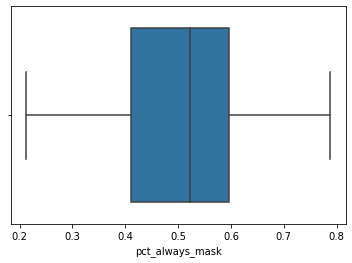

In [4]:
sns.boxplot(df['pct_always_mask'])

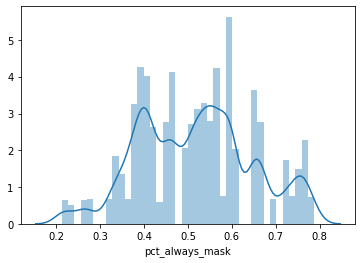

In [5]:
sns.distplot(df.pct_always_mask)

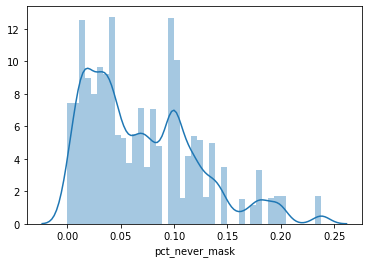

In [6]:
sns.distplot(df.pct_never_mask)

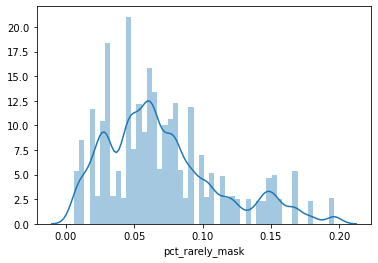

In [7]:
sns.distplot(df.pct_rarely_mask)

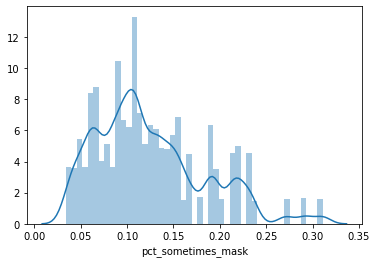

In [8]:
sns.distplot(df.pct_sometimes_mask)

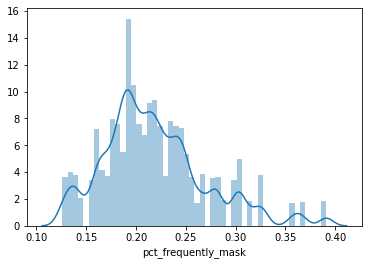

In [9]:
sns.distplot(df.pct_frequently_mask)

In [10]:
# join county data with mask use survey data

high_mask = pd.read_sql('''SELECT c.date, state, county, cases, deaths,
                           m.never as pct_never_mask,
                           m.rarely as pct_rarely_mask,
                           m.sometimes as pct_sometimes_mask,
                           m.frequently as pct_frequently_mask,
                           m.always as pct_always_mask
                    FROM counties c 
                    JOIN mask_use m on c.fips = m.countyfp
                    WHERE c.state = 'Illinois'
                    AND m.always > 0.75
                    ORDER BY c.date desc''',conn)

high_mask

,date,state,county,cases,deaths,pct_never_mask,pct_rarely_mask,pct_sometimes_mask,pct_frequently_mask,pct_always_mask
0,2020-09-08,Illinois,St. Clair,6356,178,0.032,0.027,0.037,0.138,0.767
1,2020-09-08,Illinois,Lake,15354,473,0.020,0.018,0.046,0.146,0.769
2,2020-09-08,Illinois,Kendall,1797,26,0.001,0.009,0.065,0.136,0.788
3,2020-09-08,Illinois,DuPage,15499,540,0.010,0.010,0.056,0.163,0.760
4,2020-09-08,Illinois,DeKalb,1308,36,0.007,0.012,0.034,0.191,0.756
...,...,...,...,...,...,...,...,...,...,...
882,2020-03-14,Illinois,Lake,3,0,0.020,0.018,0.046,0.146,0.769
883,2020-03-14,Illinois,DuPage,1,0,0.010,0.010,0.056,0.163,0.760
884,2020-03-13,Illinois,Lake,2,0,0.020,0.018,0.046,0.146,0.769
885,2020-03-12,Illinois,Lake,1,0,0.020,0.018,0.046,0.146,0.769


In [11]:
high_mask.date = pd.to_datetime(high_mask['date'])
high_mask = high_mask.set_index('date')
high_mask.head()

,state,county,cases,deaths,pct_never_mask,pct_rarely_mask,pct_sometimes_mask,pct_frequently_mask,pct_always_mask
date,,,,,,,,,
2020-09-08,Illinois,St. Clair,6356,178,0.032,0.027,0.037,0.138,0.767
2020-09-08,Illinois,Lake,15354,473,0.020,0.018,0.046,0.146,0.769
2020-09-08,Illinois,Kendall,1797,26,0.001,0.009,0.065,0.136,0.788
2020-09-08,Illinois,DuPage,15499,540,0.010,0.010,0.056,0.163,0.760
2020-09-08,Illinois,DeKalb,1308,36,0.007,0.012,0.034,0.191,0.756


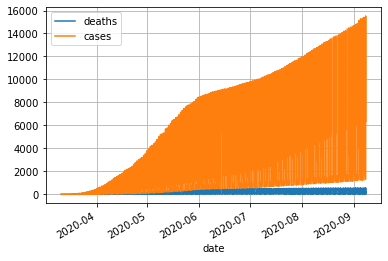

In [12]:
high_mask[['deaths','cases']].plot(grid=True)

In [13]:
high_mask.county.unique()

array(['St. Clair', 'Lake', 'Kendall', 'DuPage', 'DeKalb'], dtype=object)